# Extra Examples - TimeSeries

Like many people, I wonder where my life would be if I just bought some bitcoins back in 2009. So let's rub salt into the wound with this crypto dataset: https://www.kaggle.com/taniaj/cryptocurrency-market-history-coinmarketcap

Our exercise is thus:

1. Index the df by symbol and date
2. Find the top 5 symbols with the highest market cap (over all time)
3. Plot those samples - date vs closing price
4. Its a bit hard to see, smooth the plots with a window of 5 days
4. Create a new column that indicates a simple 1 or 0 for growth or not growth (compared to prev day)
5. Identify regions in the top coin where we had positive growth for an entire fortnight (aka 10 entries, using the above col)

In [1]:
import pandas as pd

df = pd.read_csv("all_currencies.csv", index_col=0, parse_dates=["Date"])
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


## Setting the index

In [2]:
# your code here
df2=df.set_index(['Symbol','Date'])
df2

Open      High       Low     Close  Volume  Market Cap
Symbol Date                                                                  
$$$    2015-11-12  0.000013  0.000017  0.000013  0.000017   142.0         NaN
       2015-11-13  0.000017  0.000033  0.000016  0.000024    85.0         NaN
       2015-11-14  0.000024  0.000053  0.000023  0.000030   131.0         NaN
       2015-11-15  0.000030  0.000063  0.000022  0.000035   132.0         NaN
       2015-11-16  0.000035  0.000046  0.000032  0.000036   280.0         NaN
...                     ...       ...       ...       ...     ...         ...
ZZC    2018-09-23  0.067149  0.067324  0.024069  0.024161    34.0    130705.0
       2018-09-24  0.024167  0.091875  0.024121  0.091631    58.0     47041.0
       2018-09-25  0.091528  0.091568  0.057507  0.090547   752.0    178158.0
       2018-09-26  0.090400  0.104745  0.086071  0.086559    60.0    175963.0
       2018-09-27  0.086664  0.130541  0.067363  0.073475    91.0    168691.0

[632218 rows x 6 columns]

## Finding the highest 5 market cap symbols

In [13]:
# your code here
df2['Market Cap']=df2['Market Cap'].fillna(0)
df2['Market_Cap']=df2['Market Cap']
df2

Open      High       Low     Close  Volume  Market Cap  \
Symbol Date                                                                     
$$$    2015-11-12  0.000013  0.000017  0.000013  0.000017   142.0         0.0   
       2015-11-13  0.000017  0.000033  0.000016  0.000024    85.0         0.0   
       2015-11-14  0.000024  0.000053  0.000023  0.000030   131.0         0.0   
       2015-11-15  0.000030  0.000063  0.000022  0.000035   132.0         0.0   
       2015-11-16  0.000035  0.000046  0.000032  0.000036   280.0         0.0   
...                     ...       ...       ...       ...     ...         ...   
ZZC    2018-09-23  0.067149  0.067324  0.024069  0.024161    34.0    130705.0   
       2018-09-24  0.024167  0.091875  0.024121  0.091631    58.0     47041.0   
       2018-09-25  0.091528  0.091568  0.057507  0.090547   752.0    178158.0   
       2018-09-26  0.090400  0.104745  0.086071  0.086559    60.0    175963.0   
       2018-09-27  0.086664  0.130541  0.067363  0.073475    91.0    168691.0   

                   Market_Cap  
Symbol Date                    
$$$    2015-11-12         0.0  
       2015-11-13         0.0  
       2015-11-14         0.0  
       2015-11-15         0.0  
       2015-11-16         0.0  
...                       ...  
ZZC    2018-09-23    130705.0  
       2018-09-24     47041.0  
       2018-09-25    178158.0  
       2018-09-26    175963.0  
       2018-09-27    168691.0  

[632218 rows x 7 columns]

In [32]:
a=df2.groupby('Symbol').Market_Cap.max().sort_values(ascending=False)[:5]
a.index.to_list()

['BTC', 'ETH', 'XRP', 'BCH', 'ADA']

## Plotting the closing price for those five symbols

In [33]:
# your code here
a=a.reset_index()
a

,Symbol,Market_Cap
0,BTC,3.261413e+11
1,ETH,1.355033e+11
2,XRP,1.303017e+11
3,BCH,6.593368e+10
4,ADA,3.036443e+10


In [66]:
idx = pd.IndexSlice
df5=df2.loc[idx[a.Symbol, :]]

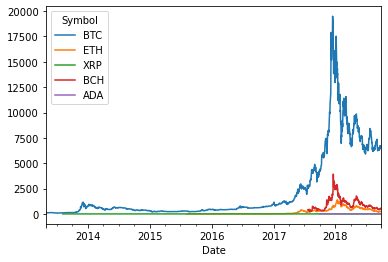

In [83]:
df5.Close.unstack().T.plot();

## Smooth it out

In [84]:
# your code here
#létre kell hozni egy fügvényt ami megadja hogy windows 5 legyen

## Create new column for growth

In [164]:
# your code here


In [182]:
df2['Growth']=df2.Close.diff()
df2=df2.fillna(0)
df2

Open      High       Low     Close  Volume  Market Cap  \
Symbol Date                                                                     
$$$    2015-11-12  0.000013  0.000017  0.000013  0.000017   142.0         0.0   
       2015-11-13  0.000017  0.000033  0.000016  0.000024    85.0         0.0   
       2015-11-14  0.000024  0.000053  0.000023  0.000030   131.0         0.0   
       2015-11-15  0.000030  0.000063  0.000022  0.000035   132.0         0.0   
       2015-11-16  0.000035  0.000046  0.000032  0.000036   280.0         0.0   
...                     ...       ...       ...       ...     ...         ...   
ZZC    2018-09-23  0.067149  0.067324  0.024069  0.024161    34.0    130705.0   
       2018-09-24  0.024167  0.091875  0.024121  0.091631    58.0     47041.0   
       2018-09-25  0.091528  0.091568  0.057507  0.090547   752.0    178158.0   
       2018-09-26  0.090400  0.104745  0.086071  0.086559    60.0    175963.0   
       2018-09-27  0.086664  0.130541  0.067363  0.073475    91.0    168691.0   

                   Market_Cap  dummy    Growth  
Symbol Date                                     
$$$    2015-11-12         0.0      0  0.000000  
       2015-11-13         0.0      1  0.000007  
       2015-11-14         0.0      1  0.000006  
       2015-11-15         0.0      1  0.000005  
       2015-11-16         0.0      1  0.000001  
...                       ...    ...       ...  
ZZC    2018-09-23    130705.0      0 -0.042955  
       2018-09-24     47041.0      1  0.067470  
       2018-09-25    178158.0      0 -0.001084  
       2018-09-26    175963.0      0 -0.003988  
       2018-09-27    168691.0      0 -0.013084  

[632218 rows x 9 columns]

In [183]:
def ossze(x):
    if x<0 or x==0:
        return 0
    else:
        return 1

In [184]:
df2['Growth']=[ossze(x) for x in df2.dummy]
df2

Open      High       Low     Close  Volume  Market Cap  \
Symbol Date                                                                     
$$$    2015-11-12  0.000013  0.000017  0.000013  0.000017   142.0         0.0   
       2015-11-13  0.000017  0.000033  0.000016  0.000024    85.0         0.0   
       2015-11-14  0.000024  0.000053  0.000023  0.000030   131.0         0.0   
       2015-11-15  0.000030  0.000063  0.000022  0.000035   132.0         0.0   
       2015-11-16  0.000035  0.000046  0.000032  0.000036   280.0         0.0   
...                     ...       ...       ...       ...     ...         ...   
ZZC    2018-09-23  0.067149  0.067324  0.024069  0.024161    34.0    130705.0   
       2018-09-24  0.024167  0.091875  0.024121  0.091631    58.0     47041.0   
       2018-09-25  0.091528  0.091568  0.057507  0.090547   752.0    178158.0   
       2018-09-26  0.090400  0.104745  0.086071  0.086559    60.0    175963.0   
       2018-09-27  0.086664  0.130541  0.067363  0.073475    91.0    168691.0   

                   Market_Cap  dummy  Growth  
Symbol Date                                   
$$$    2015-11-12         0.0      0       0  
       2015-11-13         0.0      1       1  
       2015-11-14         0.0      1       1  
       2015-11-15         0.0      1       1  
       2015-11-16         0.0      1       1  
...                       ...    ...     ...  
ZZC    2018-09-23    130705.0      0       0  
       2018-09-24     47041.0      1       1  
       2018-09-25    178158.0      0       0  
       2018-09-26    175963.0      0       0  
       2018-09-27    168691.0      0       0  

[632218 rows x 9 columns]

* df5["Growth"] = (df_5.groupby("Symbol").Close.diff() > 0).astype(int) # átírja a False és True értékeket 1 és 0 ra

## Determine periods of a stable growth in the top coin

Note we're glossing over potentially missing days, etc. We could resample to fix this, but let's keep it a bit simple. You should be able to reuse some of the rolling code above to do this.

In [195]:
# your code here
#a windows segít ebben is
#df_top = df_5.xs(symbols[0])

#stable = (df_top.Growth.rolling(window=10, min_periods=10).mean() == 1)
#stable.index[stable].to_list()

If your result agrees with mine, it looks like 2017 was a great year for bitcoin, with lots of stable growth in May.